In [42]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [48]:
torch.manual_seed(40)
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [49]:
model = nn.Sequential(
   nn.Linear(2, 1),
   nn.Sigmoid() 
)
model(x_train)

tensor([[0.5956],
        [0.6722],
        [0.3765],
        [0.5853],
        [0.5393],
        [0.3666]], grad_fn=<SigmoidBackward0>)

In [50]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 100

running_loss = []
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = model(x_train)

    # cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train)
    running_loss.append(cost)
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 10 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
        correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
        accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))

Epoch    0/100 Cost: 0.774992 Accuracy 50.00%
Epoch   10/100 Cost: 0.551845 Accuracy 66.67%
Epoch   20/100 Cost: 0.403664 Accuracy 83.33%
Epoch   30/100 Cost: 0.339950 Accuracy 83.33%
Epoch   40/100 Cost: 0.287117 Accuracy 83.33%
Epoch   50/100 Cost: 0.239519 Accuracy 100.00%
Epoch   60/100 Cost: 0.197327 Accuracy 100.00%
Epoch   70/100 Cost: 0.166062 Accuracy 100.00%
Epoch   80/100 Cost: 0.149016 Accuracy 100.00%
Epoch   90/100 Cost: 0.138306 Accuracy 100.00%
Epoch  100/100 Cost: 0.129289 Accuracy 100.00%


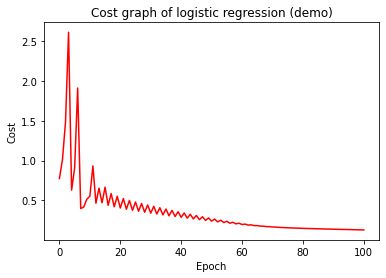

In [52]:
ax = plt.subplot()
plt.plot(torch.tensor(running_loss).detach(), 'r')
ax.set_title('Cost graph of logistic regression (demo)')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()